In [1]:
import warnings as _wrn
_wrn.filterwarnings('always')

In [2]:
import sys as _sys
import itertools as _itr

import numpy as _nmp
import numpy.random as _rnd
import matplotlib.pyplot as _plt
import pandas as _pnd

%load_ext autoreload
%autoreload 2
%matplotlib inline

_plt.style.use('ggplot')

In [3]:
import eQTLseq as _assoc

In [87]:
GENO = _nmp.loadtxt('/Users/dimitris/WTCHG/Workstation/Data/1000g/VCF/YRI/chroms/10.012', dtype='int')
GENO = GENO[:, _nmp.sum(GENO, 0) > 0]
COUNTS = _pnd.read_table('/Users/dimitris/WTCHG/Workstation/Data/1000g/counts/YRI.counts.clean.txt')

data = {
    'G': GENO,
    'Z': COUNTS.iloc[:, 2:].values
}

print(data['G'].shape)
print(data['Z'].shape)

(58, 92)
(12407, 58)


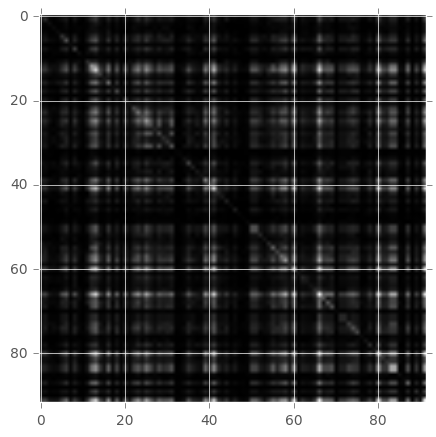

In [88]:
_plt.figure(figsize=(5,5));
_plt.imshow(data['G'].T.dot(data['G']), cmap=_plt.cm.Greys_r);

In [89]:
_rnd.seed(0)
Z = data['Z'] / _assoc.calculate_norm_factors(data['Z'])
Z = _assoc.transform_data(Z, kind='log')
res = _assoc.run(Z, data['G'], n_iters = 1000, mdl='Normal', scale=True, n_threads=1)

Starting...
Iteration 1000 of 1000
Done!


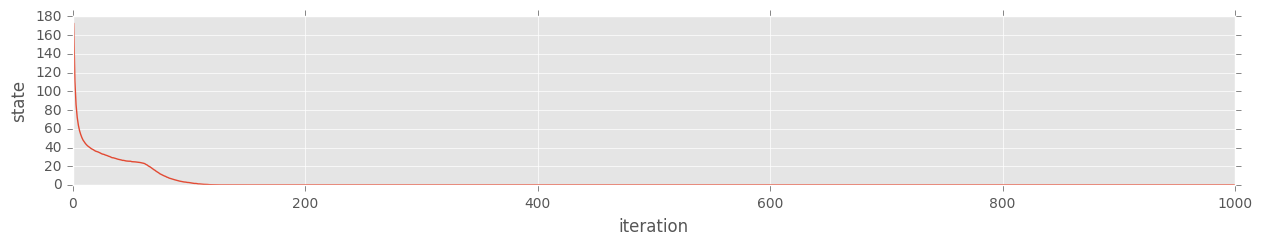

In [86]:
_plt.figure(figsize = (15,10));
_plt.subplot(4,1,1); _plt.plot(res['state']); _plt.xlabel('iteration'); _plt.ylabel('state')

# def fcn():
#     _plt.figure(figsize = (15,10));
#     _plt.subplot(4,1,1); _plt.plot(res['state']); _plt.xlabel('iteration'); _plt.ylabel('state')
# 
#     beta_estim = res['beta'] / _nmp.abs(res['beta']).sum()
#     beta_true = data['beta'] / _nmp.abs(data['beta']).sum()
#     n_genes, n_markers = beta_true.shape
# 
#     _plt.subplot(4,1,2); 
#     _plt.vlines(range(n_markers * n_genes), 0, beta_true.ravel()); 
#     _plt.axhline(linestyle='--', color='k');
#     _plt.plot(beta_estim.ravel(), 'r.'); _plt.xlabel('markers x genes'); _plt.ylabel('effect size')
# 
#     if 'mu' in res:
#         G = data['G']
#     #     G = (G - _nmp.mean(G, 0)) / _nmp.std(G, 0)
#         folds_true = _nmp.mean(G.dot(beta_true.T), 0) * data['mu']
#         folds_estim = _nmp.mean(G.dot(beta_estim.T), 0) * res['mu']
#         n_samples, _ = G.shape
#         _plt.subplot(4,1,3); 
#         _plt.vlines(range(n_genes), 0, folds_true.ravel()); 
#         _plt.axhline(linestyle='--', color='k');
#         _plt.plot(folds_estim.ravel(), 'r.'); _plt.xlabel('genes'); _plt.ylabel('log(folds)')
#     
#     if 'Y' in res:
#         _plt.subplot(4,1,4); 
#         _plt.plot(res['Y'].ravel(), 'r.'); _plt.xlabel('genes'); _plt.ylabel('log(folds)')
#         _plt.axhline(linestyle='--', color='k');

#     _plt.tight_layout()
        
#     if 'mu' in res:
#         _plt.figure(figsize = (15,10))
#         _plt.subplot(2,2,1)
#         _plt.plot(_nmp.log(data['mu']), _nmp.log(res['mu']), '.'); _plt.ylim(_plt.xlim()); 
#         _plt.plot(_plt.gca().get_xlim(),_plt.gca().get_ylim(), '--k'); 
#         _plt.xlabel('true log(mu)'); _plt.ylabel('estimated log(mu)')

#         if 'phi' in res:
#             var_tru = data['mu'] + data['phi'] * data['mu']**2
#             var_est = res['mu'] + res['phi'] * res['mu']**2
            
#             _plt.subplot(2,2,2)
#             _plt.plot(_nmp.log(var_tru), _nmp.log(var_est), '.'); _plt.ylim(_plt.xlim()); 
#             _plt.plot(_plt.gca().get_xlim(),_plt.gca().get_ylim(), '--k'); 
#             _plt.xlabel('true log(var)'); _plt.ylabel('estimated log(var)')

#             _plt.subplot(2,2,3)
#             _plt.plot(_nmp.log(data['phi']), _nmp.log(res['phi']), '.'); _plt.ylim(_plt.xlim()); 
#             _plt.plot(_plt.gca().get_xlim(),_plt.gca().get_ylim(), '--k'); 
#             _plt.xlabel('true log(phi)'); _plt.ylabel('estimated log(phi)')
                        
#     _plt.tight_layout()

#     return _assoc.calculate_metrics(res['beta'], data['beta'])

# ##
# metrics = fcn()
# [metrics[_] for _ in ['RSS', 'TPR', 'FDR', 'TP', 'FP', 'TN', 'FN']], metrics['MCC']/(metrics['RSS'] + 1)

In [66]:
_nmp.sum(res['beta'] > 1e-4)

0

In [50]:
_nmp.sum(GENO, 0)

array([24, 12, 20, 21, 32, 39, 52, 21,  2, 14,  4, 35, 23, 59, 40, 23, 52,
       39, 33, 47, 16, 52, 14, 38, 20, 97, 43,  9, 16,  8,  3, 19, 17,  1,
       17,  3, 42, 54,  1, 16, 57, 36, 55, 15, 15, 43, 56,  2, 39, 34])

In [42]:
GENO.shape

(58, 51)